In [1]:
import pandas as pd

# Load the CSV file
file_path = 'cancer patient data sets.csv'
cancer_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
cancer_data.head()


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [2]:
# Checking for missing values
missing_values = cancer_data.isnull().sum()
print(missing_values)

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


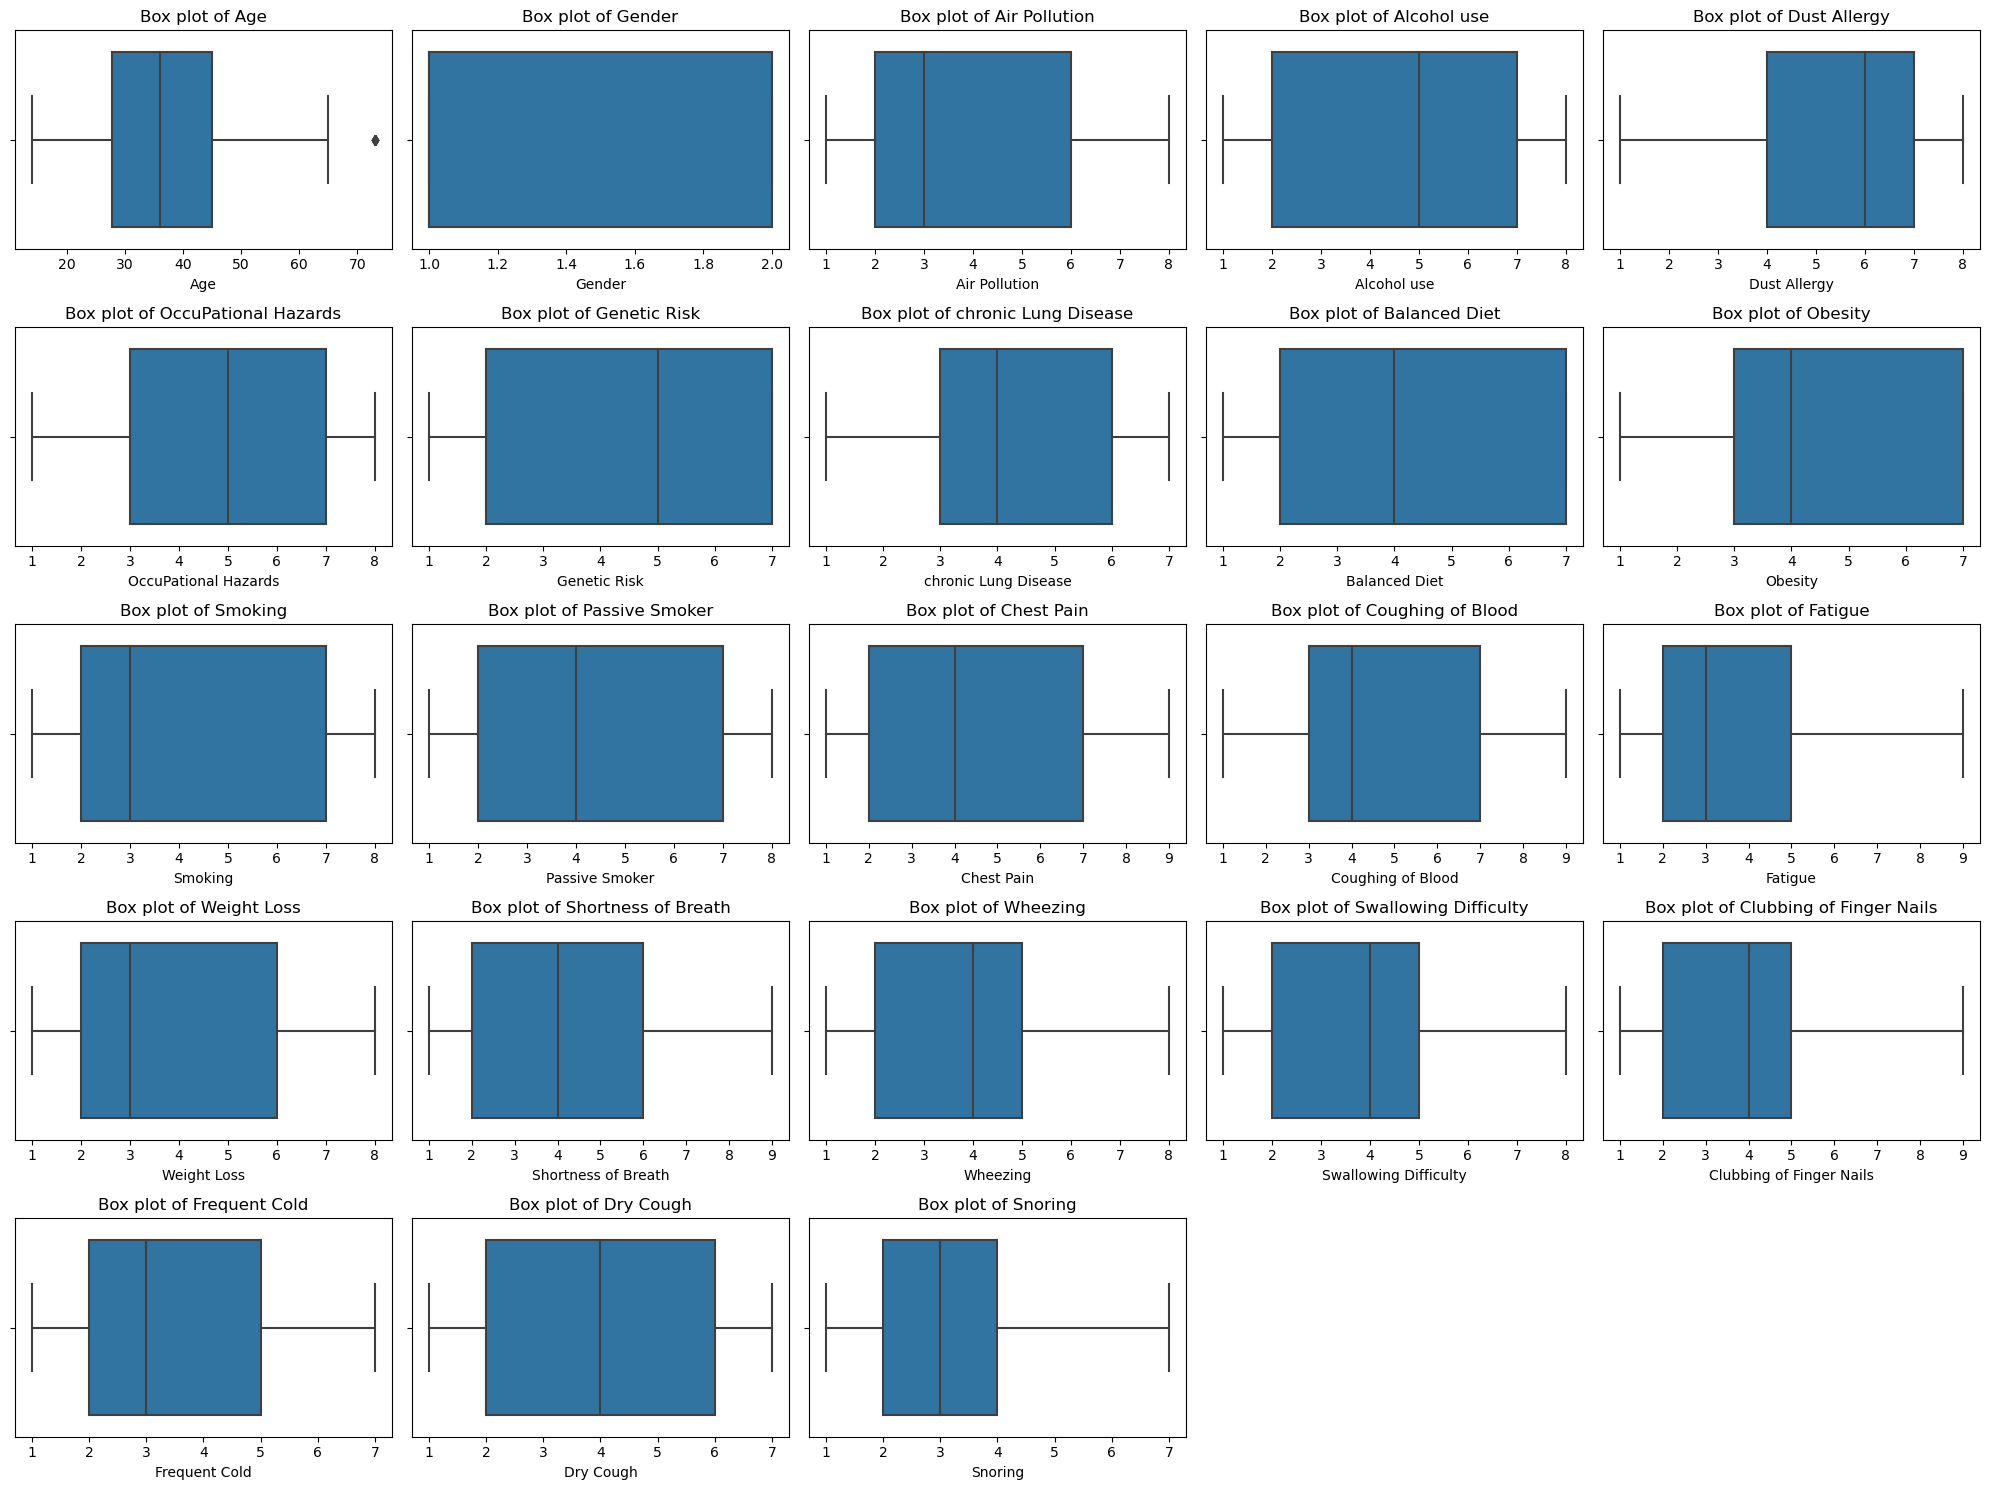

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify abnormal data points using box plots for visual inspection
plt.figure(figsize=(20, 15))
for i, column in enumerate(cancer_data.columns[2:-1], 1):  # Exclude 'index', 'Patient Id', and 'Level'
    plt.subplot(5, 5, i)
    sns.boxplot(x=cancer_data[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

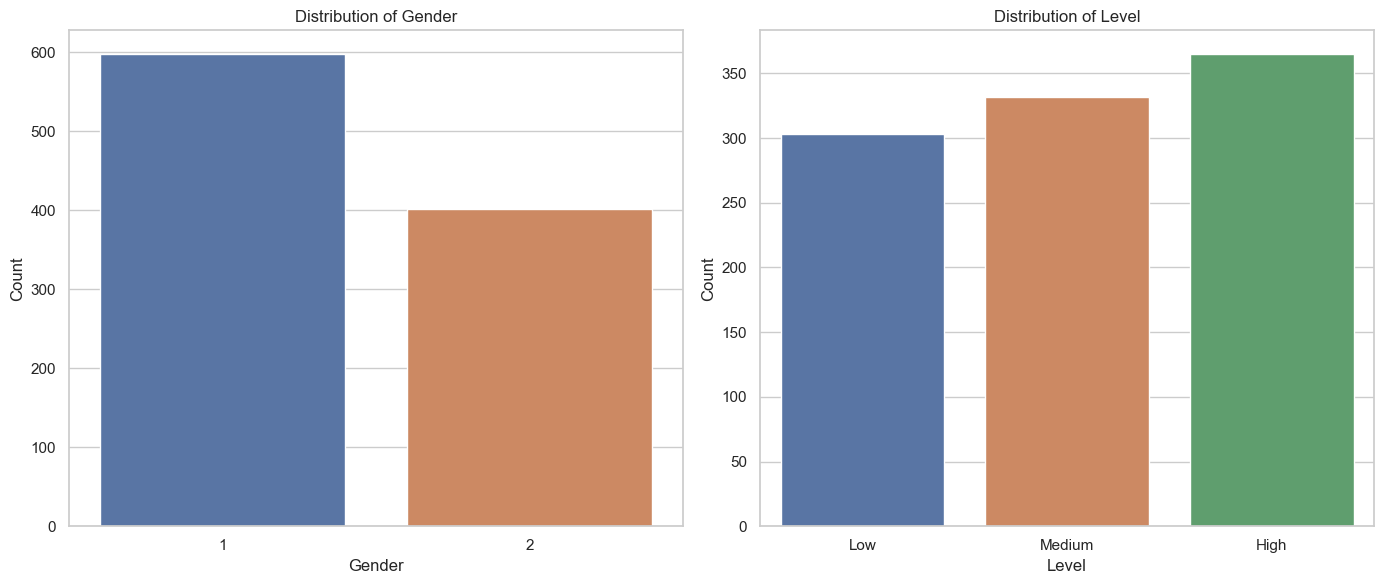

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Define the categorical variables
categorical_vars = ['Gender', 'Level']

# Plot frequency distribution for categorical variables
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=cancer_data, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


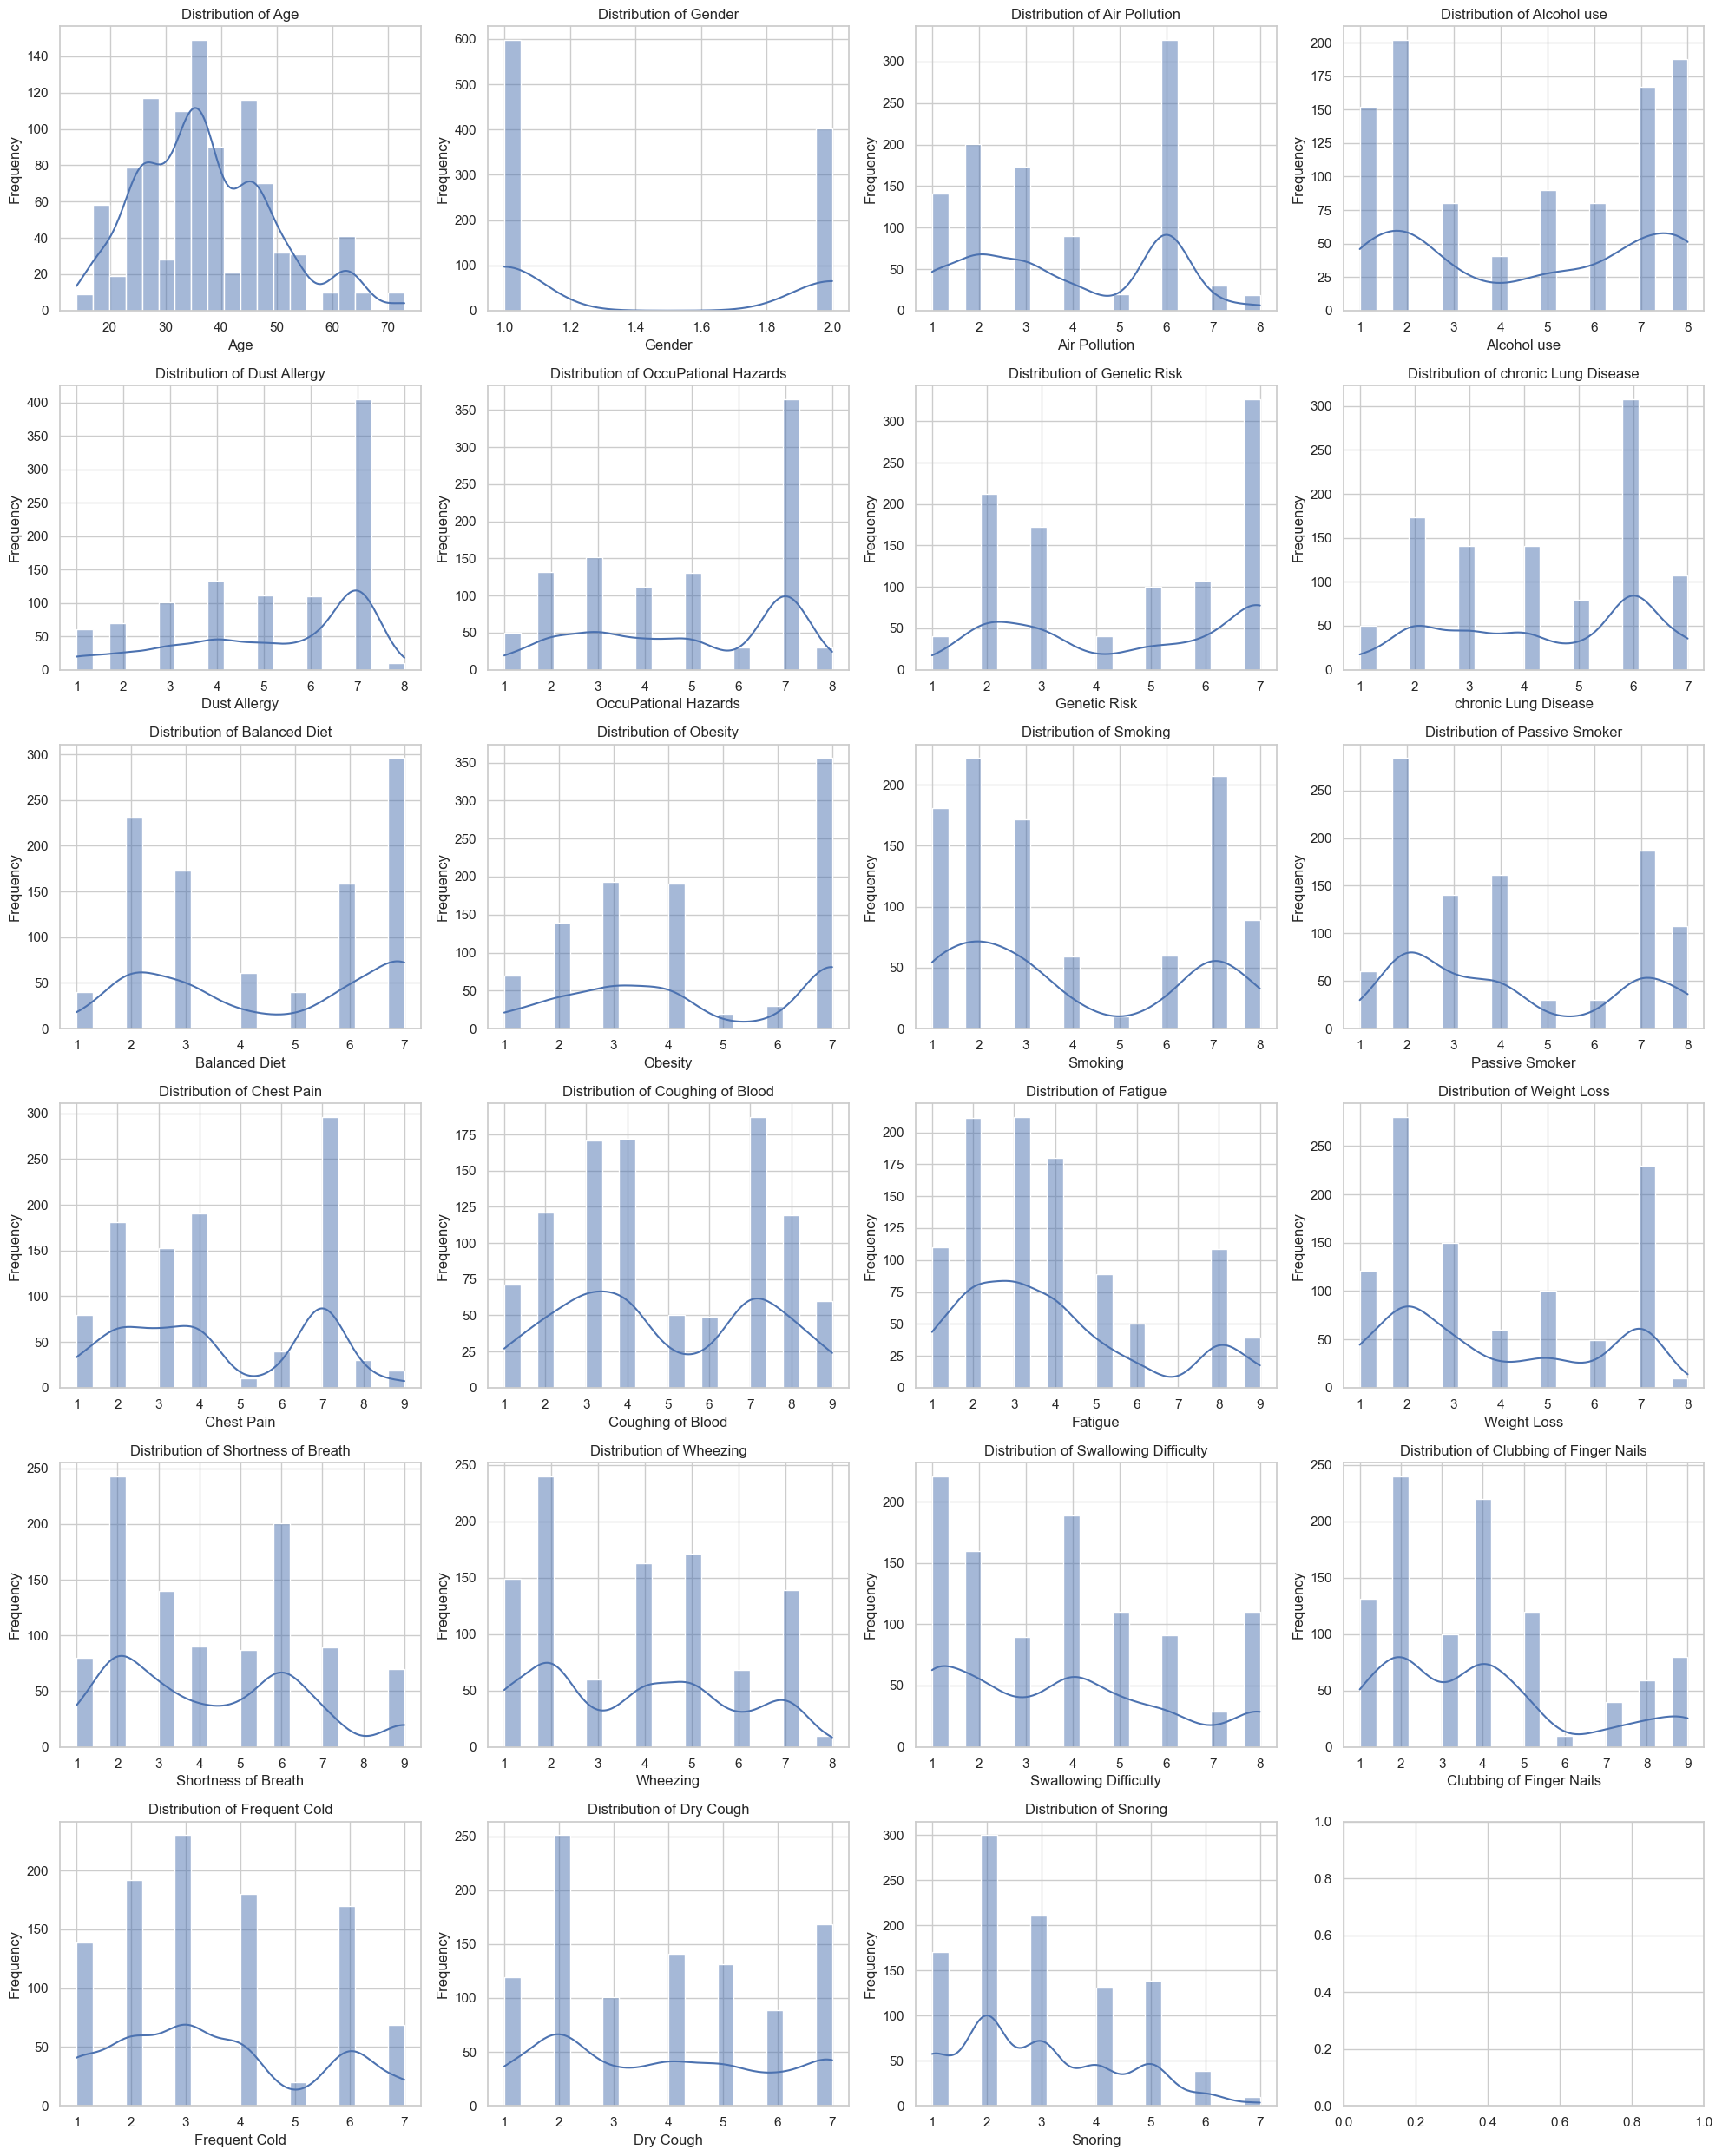

In [5]:
# Define numerical variables
numerical_vars = cancer_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_vars.remove('index')

# Plot histograms for numerical variables
fig, axes = plt.subplots(6, 4, figsize=(20, 25))

for i, var in enumerate(numerical_vars):
    sns.histplot(cancer_data[var], bins=20, kde=True, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Distribution of {var}')
    axes[i//4, i%4].set_xlabel(var)
    axes[i//4, i%4].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [6]:
from scipy.stats import chi2_contingency

# Cross-tabulation between Gender and Level
cross_tab = pd.crosstab(cancer_data['Gender'], cancer_data['Level'])

# Chi-square test
chi2, p, dof, ex = chi2_contingency(cross_tab)

cross_tab, chi2, p


(Level   High  Low  Medium
 Gender                   
 1        252  149     197
 2        113  154     135,
 27.22494142912069,
 1.2251212802771069e-06)

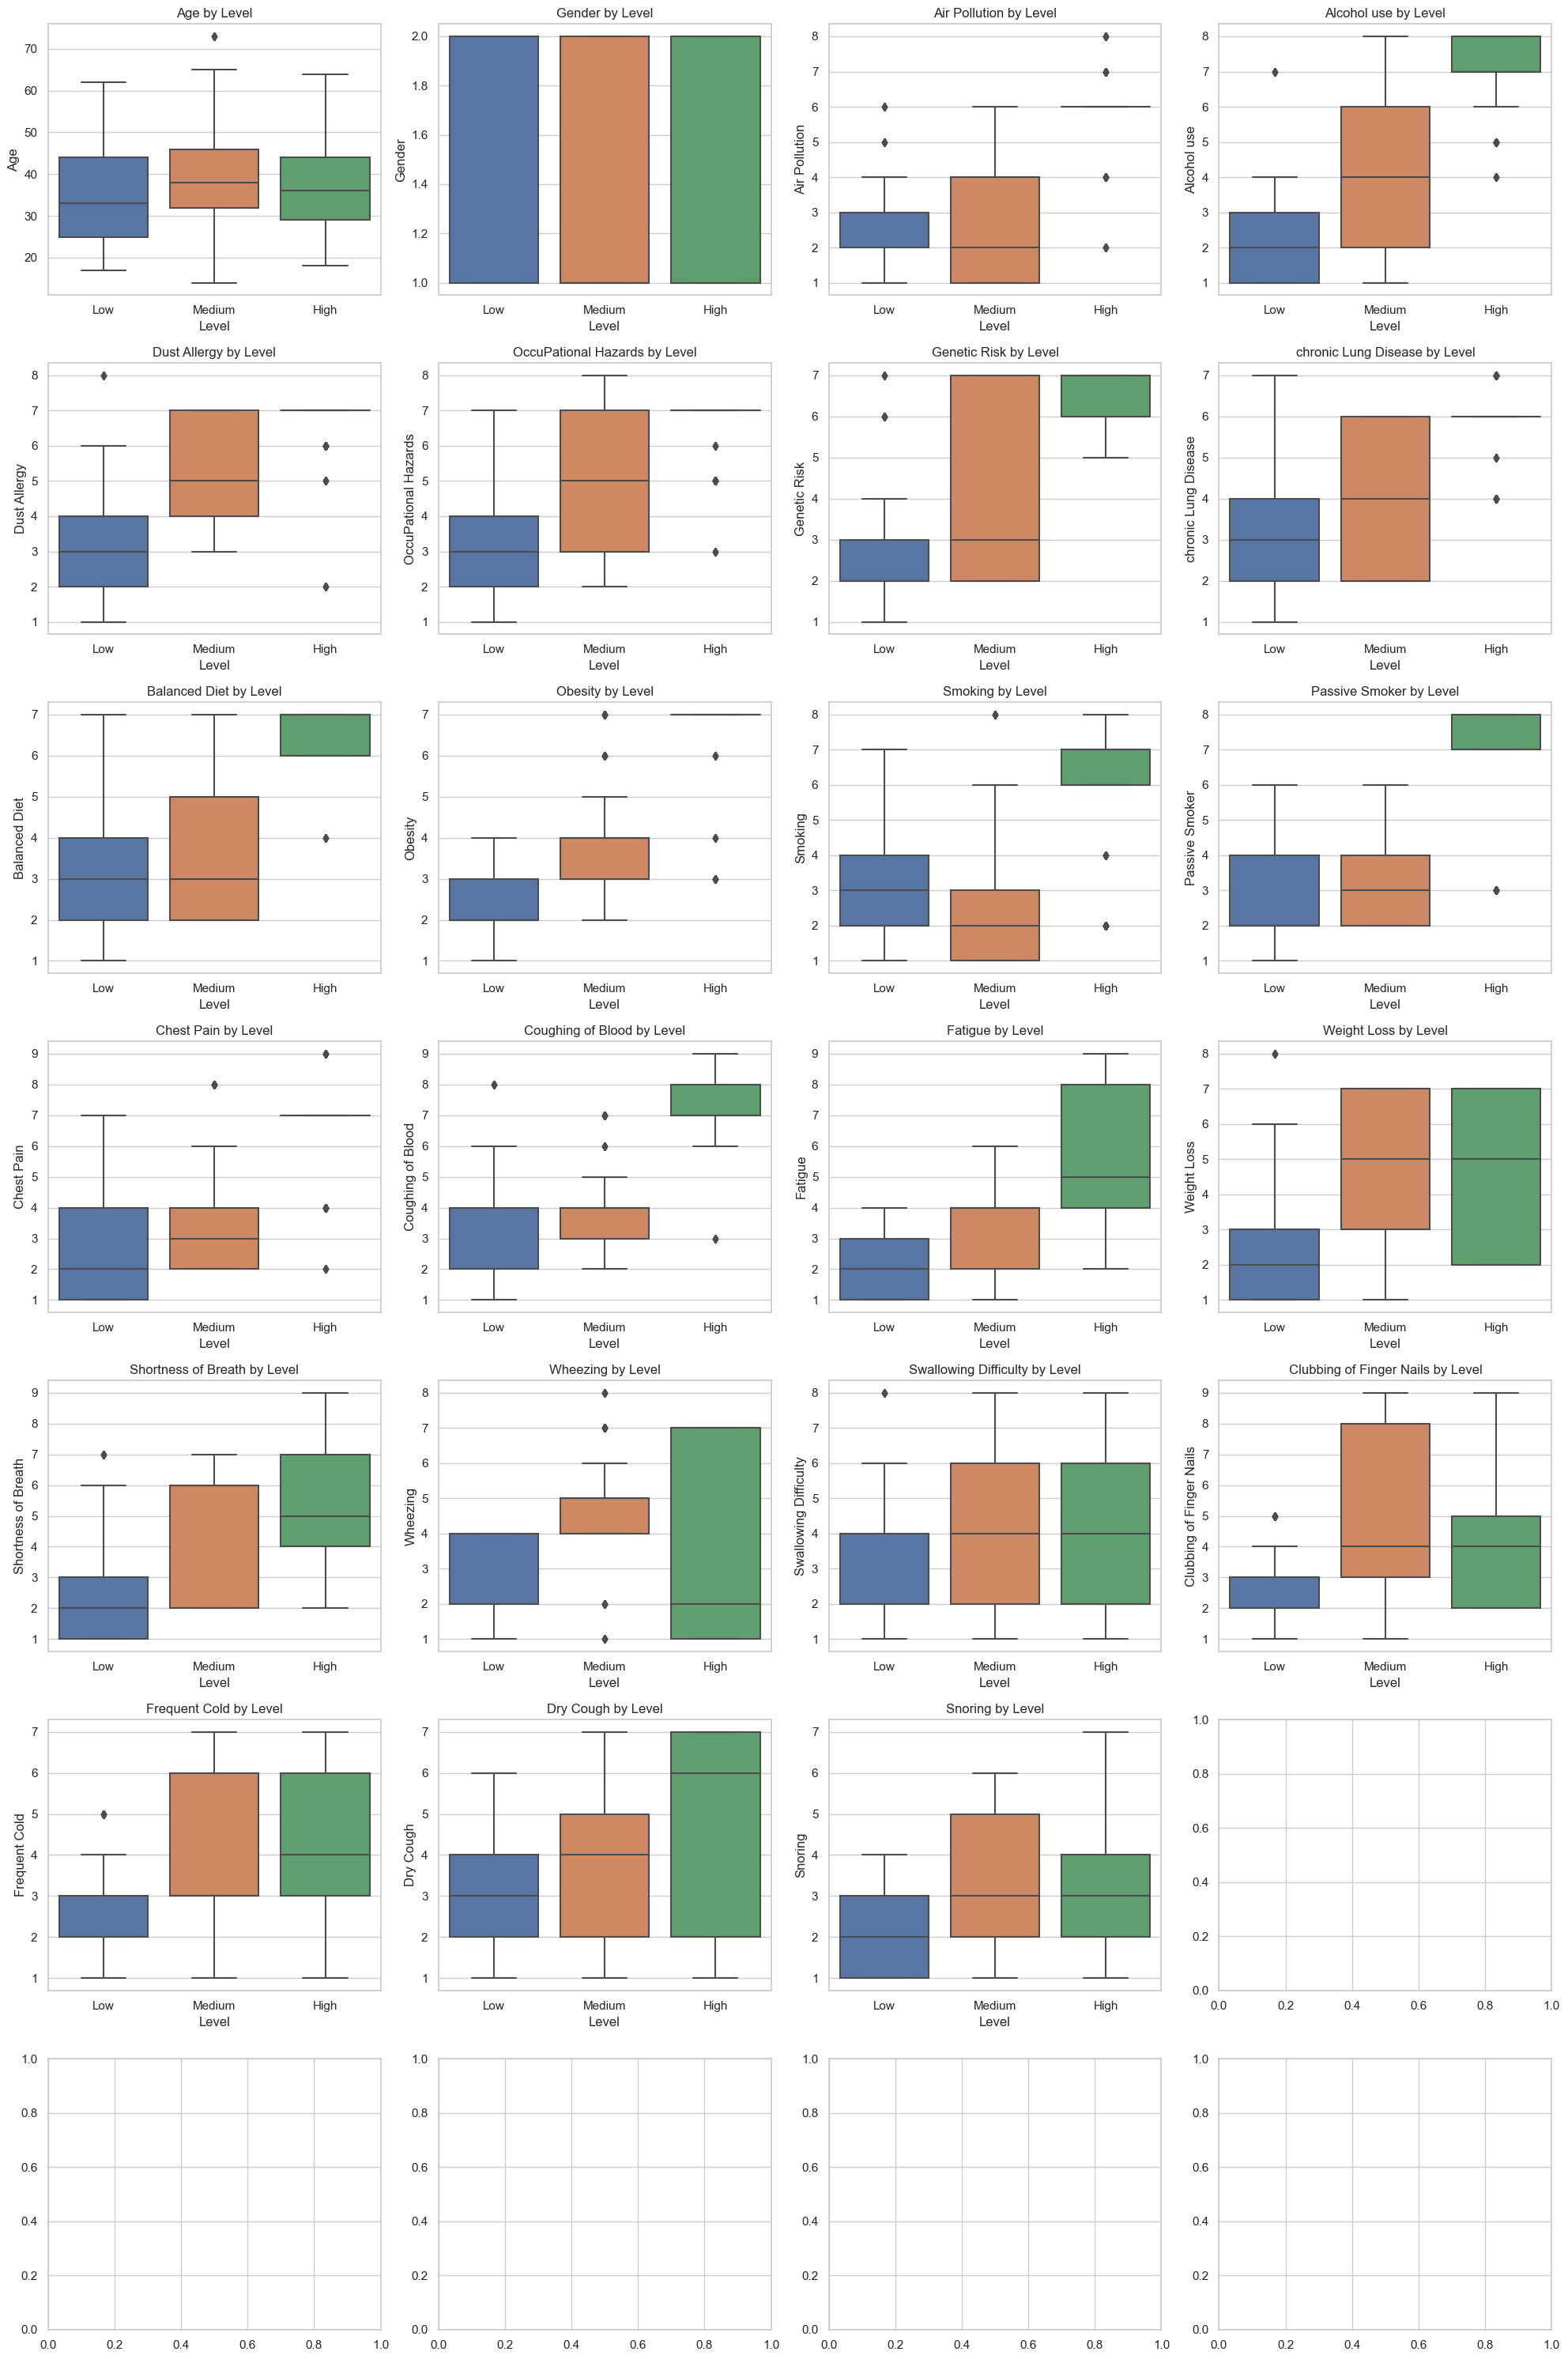

In [7]:
# Plot box plots for numerical variables against Level
fig, axes = plt.subplots(7, 4, figsize=(20, 30))

for i, var in enumerate(numerical_vars):
    sns.boxplot(x='Level', y=var, data=cancer_data, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'{var} by Level')
    axes[i//4, i%4].set_xlabel('Level')
    axes[i//4, i%4].set_ylabel(var)

plt.tight_layout()
plt.show()


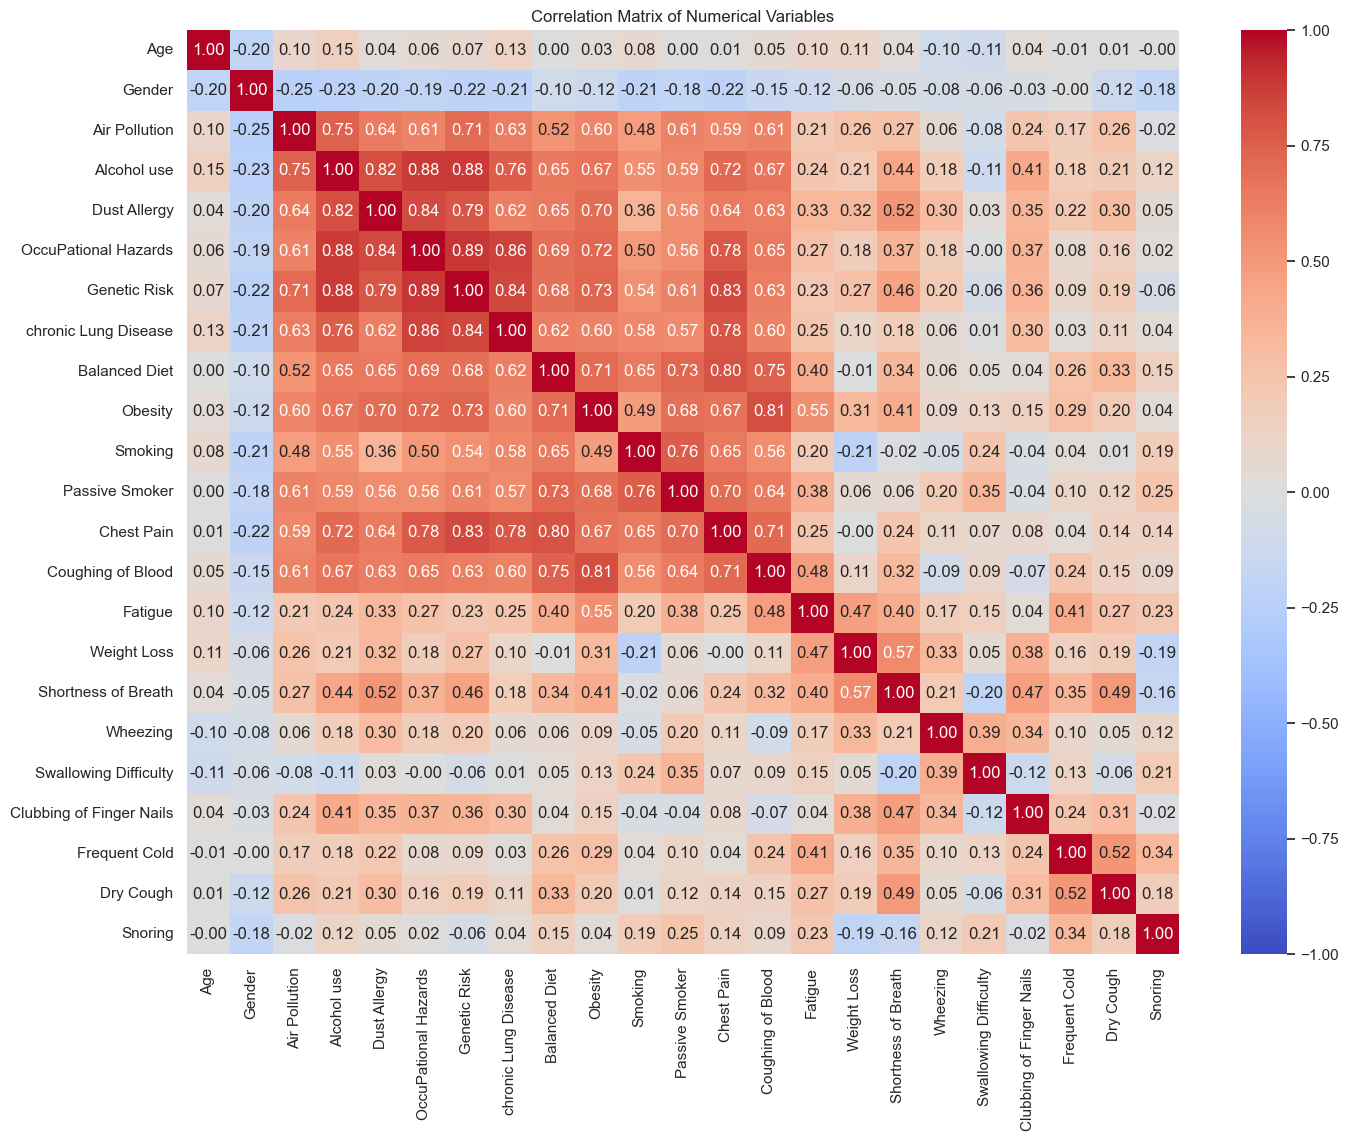

In [8]:
# Calculate the correlation matrix
corr_matrix = cancer_data[numerical_vars].corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


In [10]:
# Data Cleaning: Drop irrelevant columns and handle any potential missing values

# Drop 'index' and 'Patient Id' columns as they are not needed for modeling
data_cleaned = cancer_data.drop(columns=['index', 'Patient Id'])

# Check for missing values
missing_values = data_cleaned.isnull().sum()

# Display cleaned data and missing values summary
data_cleaned_head = data_cleaned.head()
missing_values, data_cleaned_head


(Age                         0
 Gender                      0
 Air Pollution               0
 Alcohol use                 0
 Dust Allergy                0
 OccuPational Hazards        0
 Genetic Risk                0
 chronic Lung Disease        0
 Balanced Diet               0
 Obesity                     0
 Smoking                     0
 Passive Smoker              0
 Chest Pain                  0
 Coughing of Blood           0
 Fatigue                     0
 Weight Loss                 0
 Shortness of Breath         0
 Wheezing                    0
 Swallowing Difficulty       0
 Clubbing of Finger Nails    0
 Frequent Cold               0
 Dry Cough                   0
 Snoring                     0
 Level                       0
 dtype: int64,
    Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
 0   33       1              2            4             5   
 1   17       1              3            1             5   
 2   35       1              4            5             6 

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode the target variable 'Level'
label_encoder = LabelEncoder()
data_cleaned['Level'] = label_encoder.fit_transform(data_cleaned['Level'])

# Standardize the numerical features
scaler = StandardScaler()
numerical_features = data_cleaned.drop(columns=['Level']).columns
data_cleaned[numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])

# Display the first few rows of the processed data
processed_data_head = data_cleaned.head()
processed_data_head


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,-0.347848,-0.819903,-0.906679,-0.214954,-0.083340,-0.398718,-0.743202,-1.288162,-1.167040,-0.218941,...,-0.381548,0.065746,-0.980760,-0.870694,-0.328743,-1.224625,-0.838618,-0.418550,0.728655,1
1,-1.681238,-0.819903,-0.413919,-1.360357,-0.083340,-0.873383,-0.272821,-1.288162,-1.167040,-1.160623,...,-1.273014,-0.387677,1.208436,2.069186,0.993281,-0.805663,-1.384593,1.544171,-0.628245,2
2,-0.181174,-0.819903,0.078842,0.166847,0.421751,0.075946,0.197560,-0.205673,0.706970,1.193582,...,1.847119,1.426018,2.084114,-0.870694,-1.210093,0.032260,1.345283,1.544171,-0.628245,0
3,-0.014501,-0.819903,1.557123,0.930449,0.926842,1.025275,0.667941,1.418061,1.175473,1.193582,...,0.064186,-0.841101,-0.542921,-1.360675,0.111931,0.451222,1.345283,1.544171,1.407105,0
4,0.735531,-0.819903,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,-0.381548,-0.841101,-0.105081,-1.360675,0.111931,-0.805663,0.253332,-0.909231,0.050205,0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X = data_cleaned.drop(columns=['Level'])
y = data_cleaned['Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()

# Train models
log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

# Predict on test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)

# Evaluate models
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

log_reg_metrics = evaluate_model(y_test, y_pred_log_reg)
random_forest_metrics = evaluate_model(y_test, y_pred_random_forest)
decision_tree_metrics = evaluate_model(y_test, y_pred_decision_tree)

log_reg_metrics, random_forest_metrics, decision_tree_metrics


((1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0))

In [13]:
from sklearn.model_selection import cross_val_score

# Cross-validation with 5 folds
cv_scores_log_reg = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
cv_scores_random_forest = cross_val_score(random_forest, X, y, cv=5, scoring='accuracy')
cv_scores_decision_tree = cross_val_score(decision_tree, X, y, cv=5, scoring='accuracy')

cv_scores_log_reg.mean(), cv_scores_random_forest.mean(), cv_scores_decision_tree.mean()


(1.0, 1.0, 1.0)

In [14]:
# Feature importance analysis for the Random Forest model
feature_importances = random_forest.feature_importances_
feature_names = X.columns

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
importance_df.head(10)


,Feature,Importance
13,Coughing of Blood,0.121322
11,Passive Smoker,0.104463
9,Obesity,0.101595
17,Wheezing,0.078663
16,Shortness of Breath,0.059524
14,Fatigue,0.059215
3,Alcohol use,0.044108
5,OccuPational Hazards,0.041342
18,Swallowing Difficulty,0.040449
4,Dust Allergy,0.039559


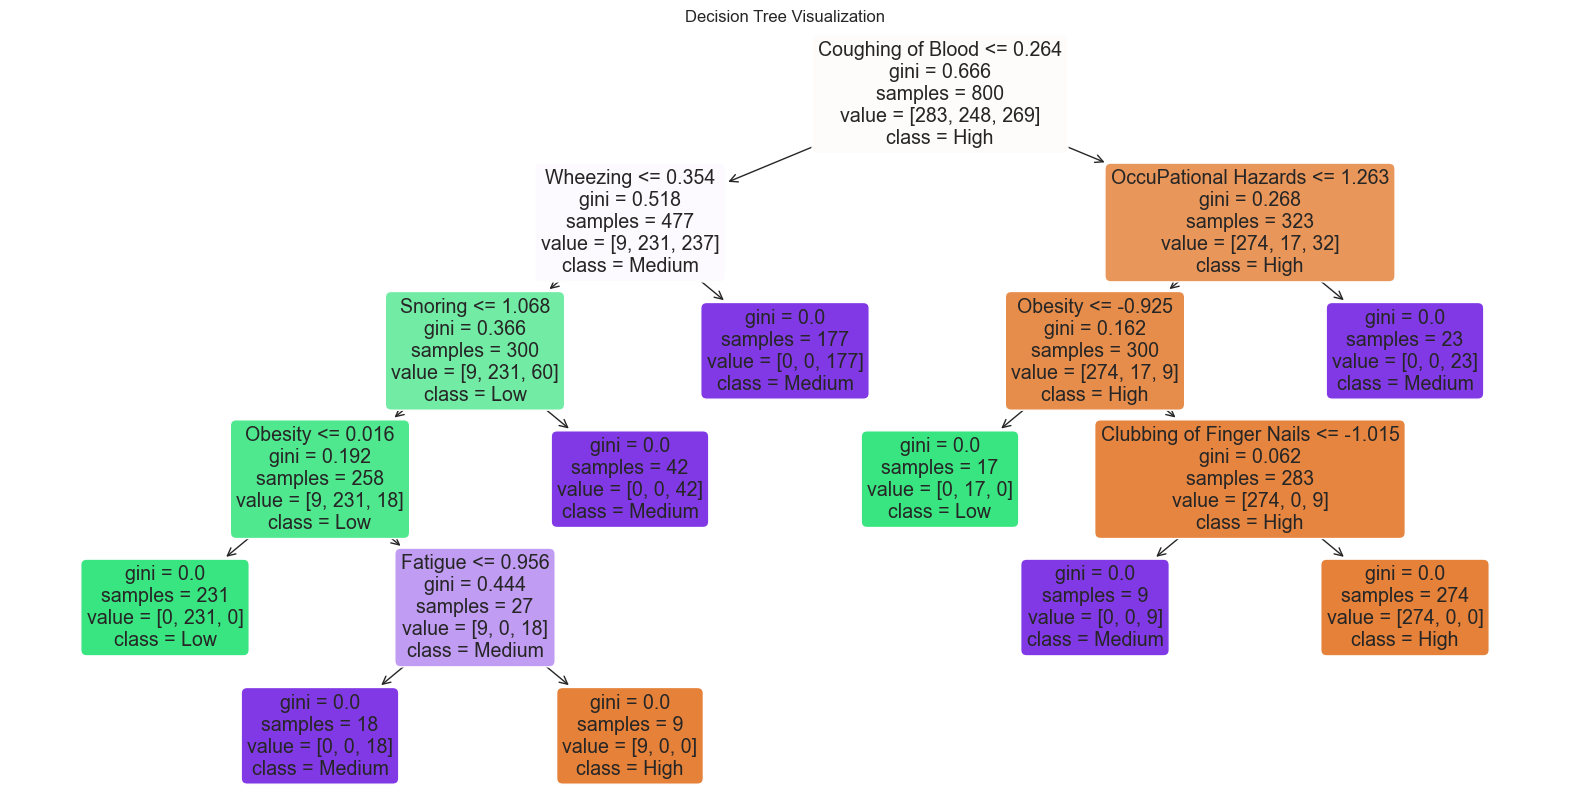

In [15]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=feature_names, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()
